In [2]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 102kB/s 
     |████████████████████████████████| 20.2MB 22.9MB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
# import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [211]:
!ls 'drive/My Drive/CVIT Day 4/Feature Matching/'

ls: cannot access 'drive/My Drive/CVIT Day 4/Feature Matching/': No such file or directory


In [5]:
cd drive/My Drive/CVIT Day 4


/content/drive/My Drive/CVIT Day 4


In [6]:
cd Day4 Material

/content/drive/My Drive/CVIT Day 4/Day4 Material


In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

In [0]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1,None)
kp2, des2 = orb.detectAndCompute(image2,None)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

In [0]:
def window(I,x,y):
  b=I[x-1:x+2,y-1:y+2].flatten()
  return b

print(window(image1,15,15))

[196 195 198 196 196 199 197 196 198]


Text(0.5, 0, '(b)')

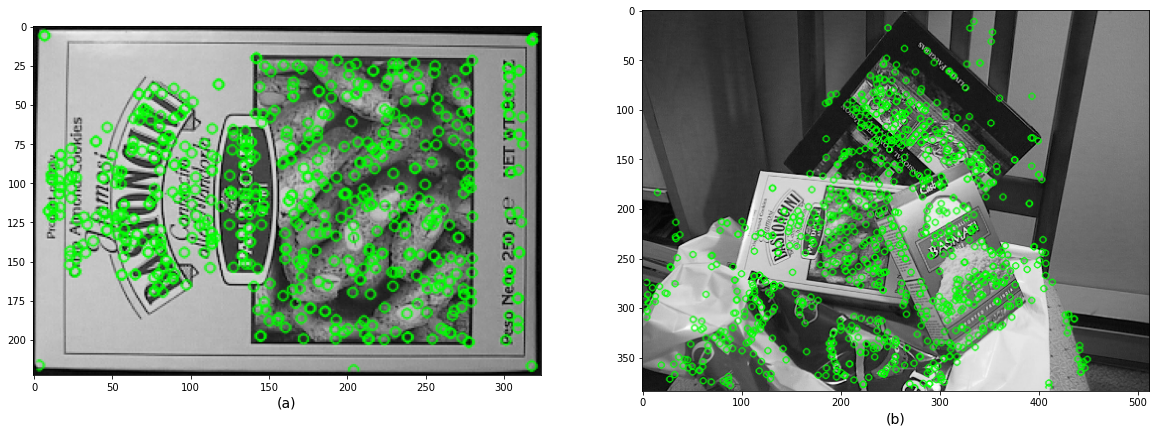

In [0]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

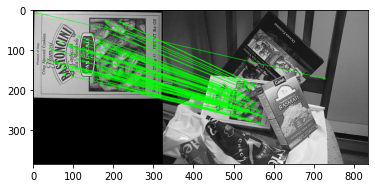

In [0]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
      good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)

## Panorama

In [195]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_2.png')
image2=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_1.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

error: ignored

In [0]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

Text(0.5, 0, '(b)')

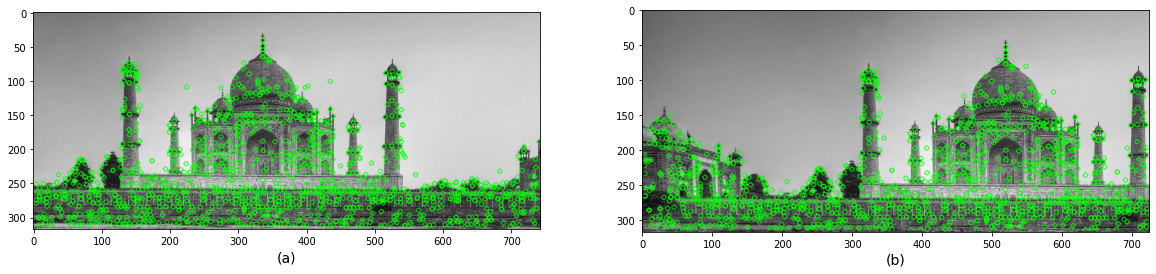

In [155]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

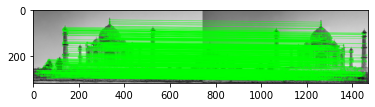

In [156]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

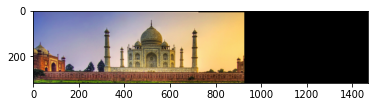

In [158]:
dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]))
# plt.imshow(dst)
dst[0:image2.shape[0],0:image2.shape[1]] = image2
plt.imshow(dst)

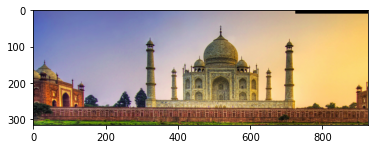

In [0]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop right
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

plt.imshow(trim(dst))
#cv2.imsave("original_image_stitched_crop.jpg", trim(dst))

In [0]:
ls

img2_1.png  img2_2.png  img2_3.png


## Panorama as a function for dealing with multiple images

In [0]:
def trim(frame):
          # return frame
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left):

      image1=cv2.imread(path_right)
      image2=cv2.imread(path_left)
      cv2_imshow(image1)
      cv2_imshow(image2)
      image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

      image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
      image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)

      MIN_MATCH_COUNT = 4
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
          print(M)
          h,w = image2_gray.shape
          pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
          dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
          dst[0:image2.shape[0],0:image2.shape[1]] = image2
          #plt.imshow(dst)

          
          #plt.imshow(trim(dst))
          #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
          return(trim(dst))
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

      dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
      dst[0:image2.shape[0],0:image2.shape[1]] = image2
      #plt.imshow(dst)

      
      #plt.imshow(trim(dst))
      #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
      return(trim(dst))

['WhatsApp Image 2020-05-29 at 10.13.54 PM.jpeg', 'WhatsApp Image 2020-05-29 at 10.13.55 PM.jpeg']


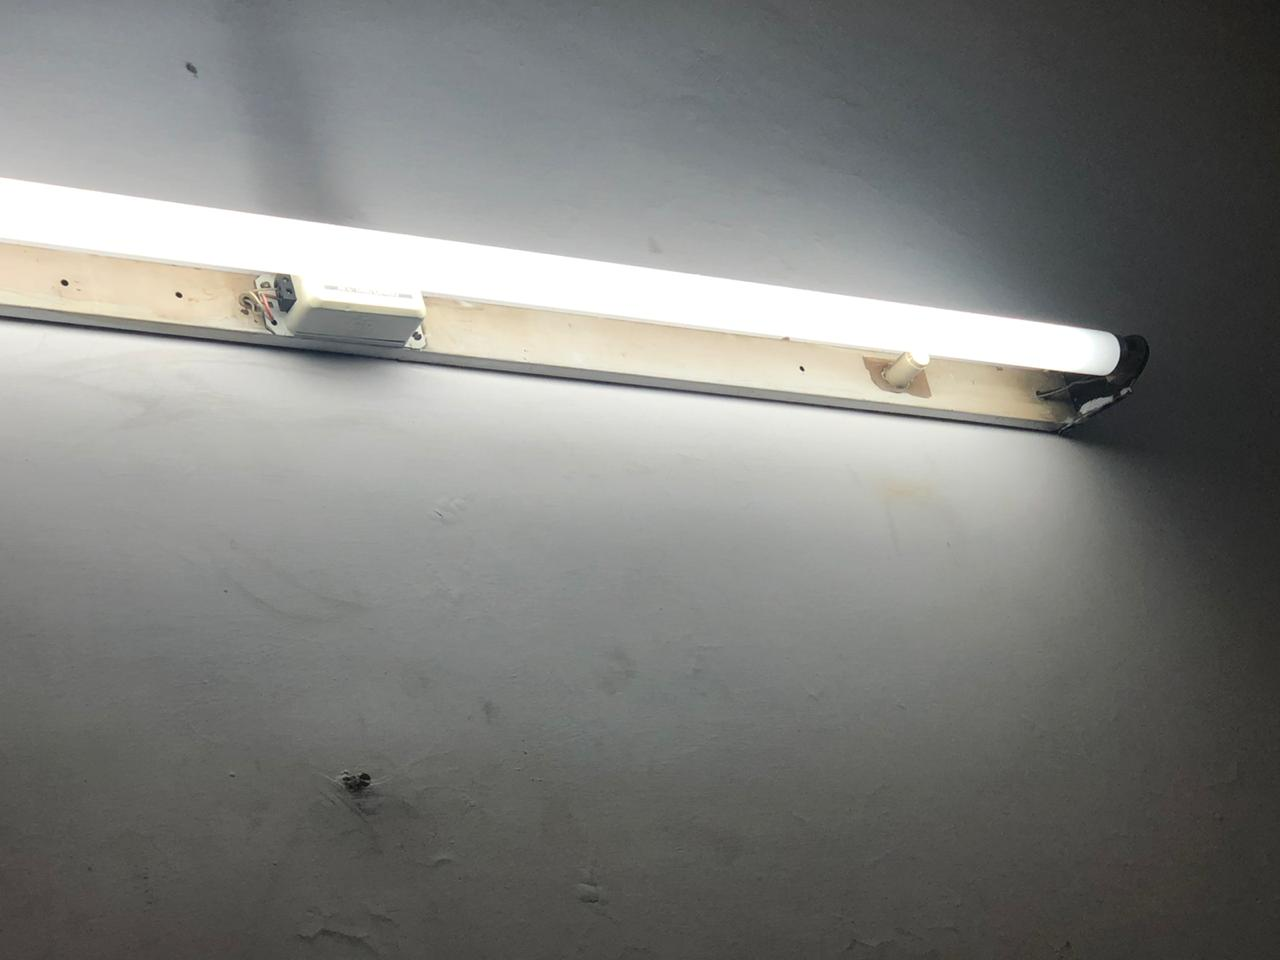

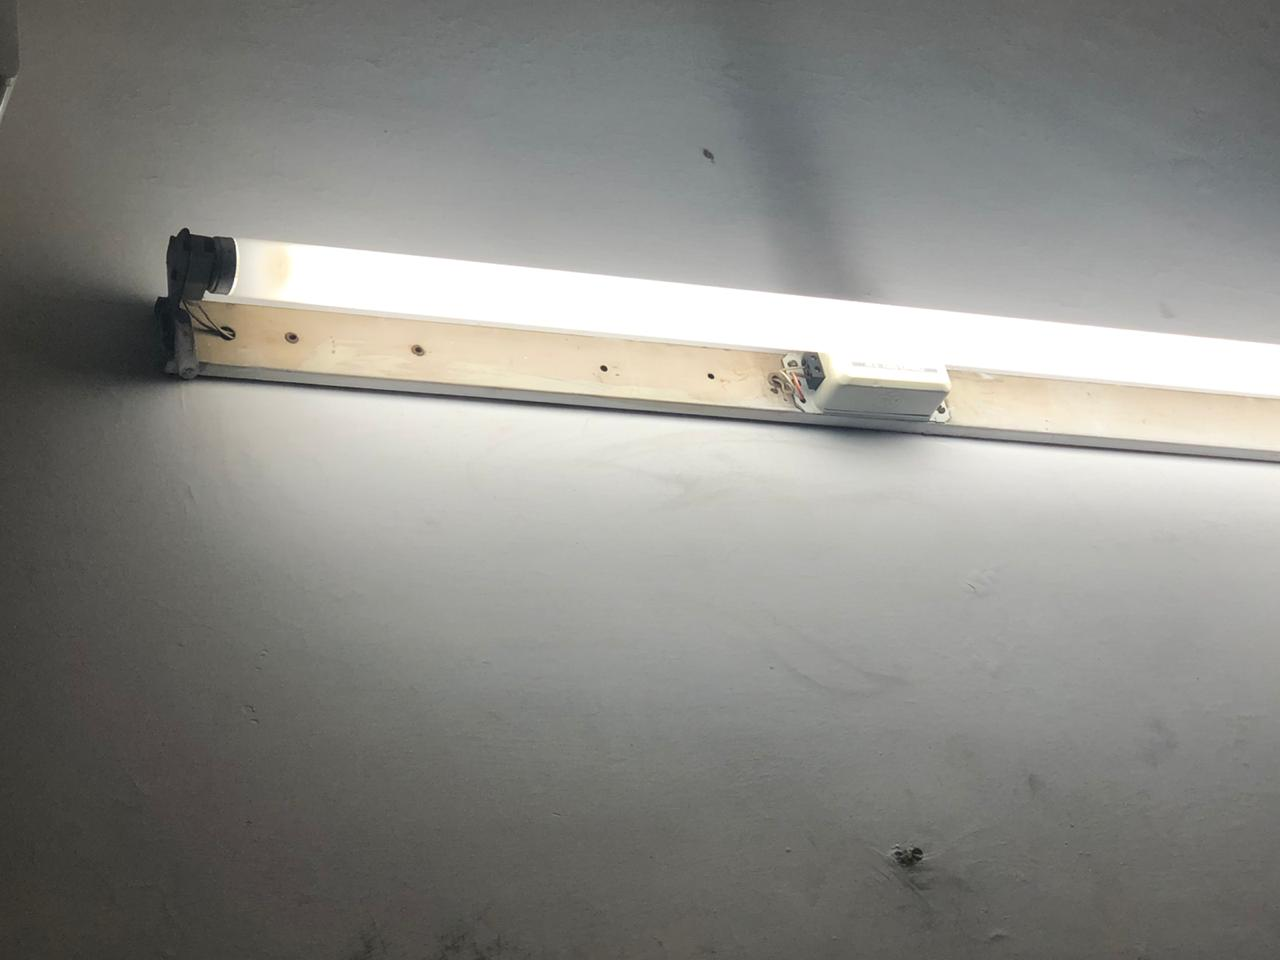

[[ 9.19987034e-01  6.63978810e-02  5.24477764e+02]
 [-4.62428600e-02  9.97608496e-01  8.89657014e+01]
 [-3.75344802e-05  1.14103858e-05  1.00000000e+00]]


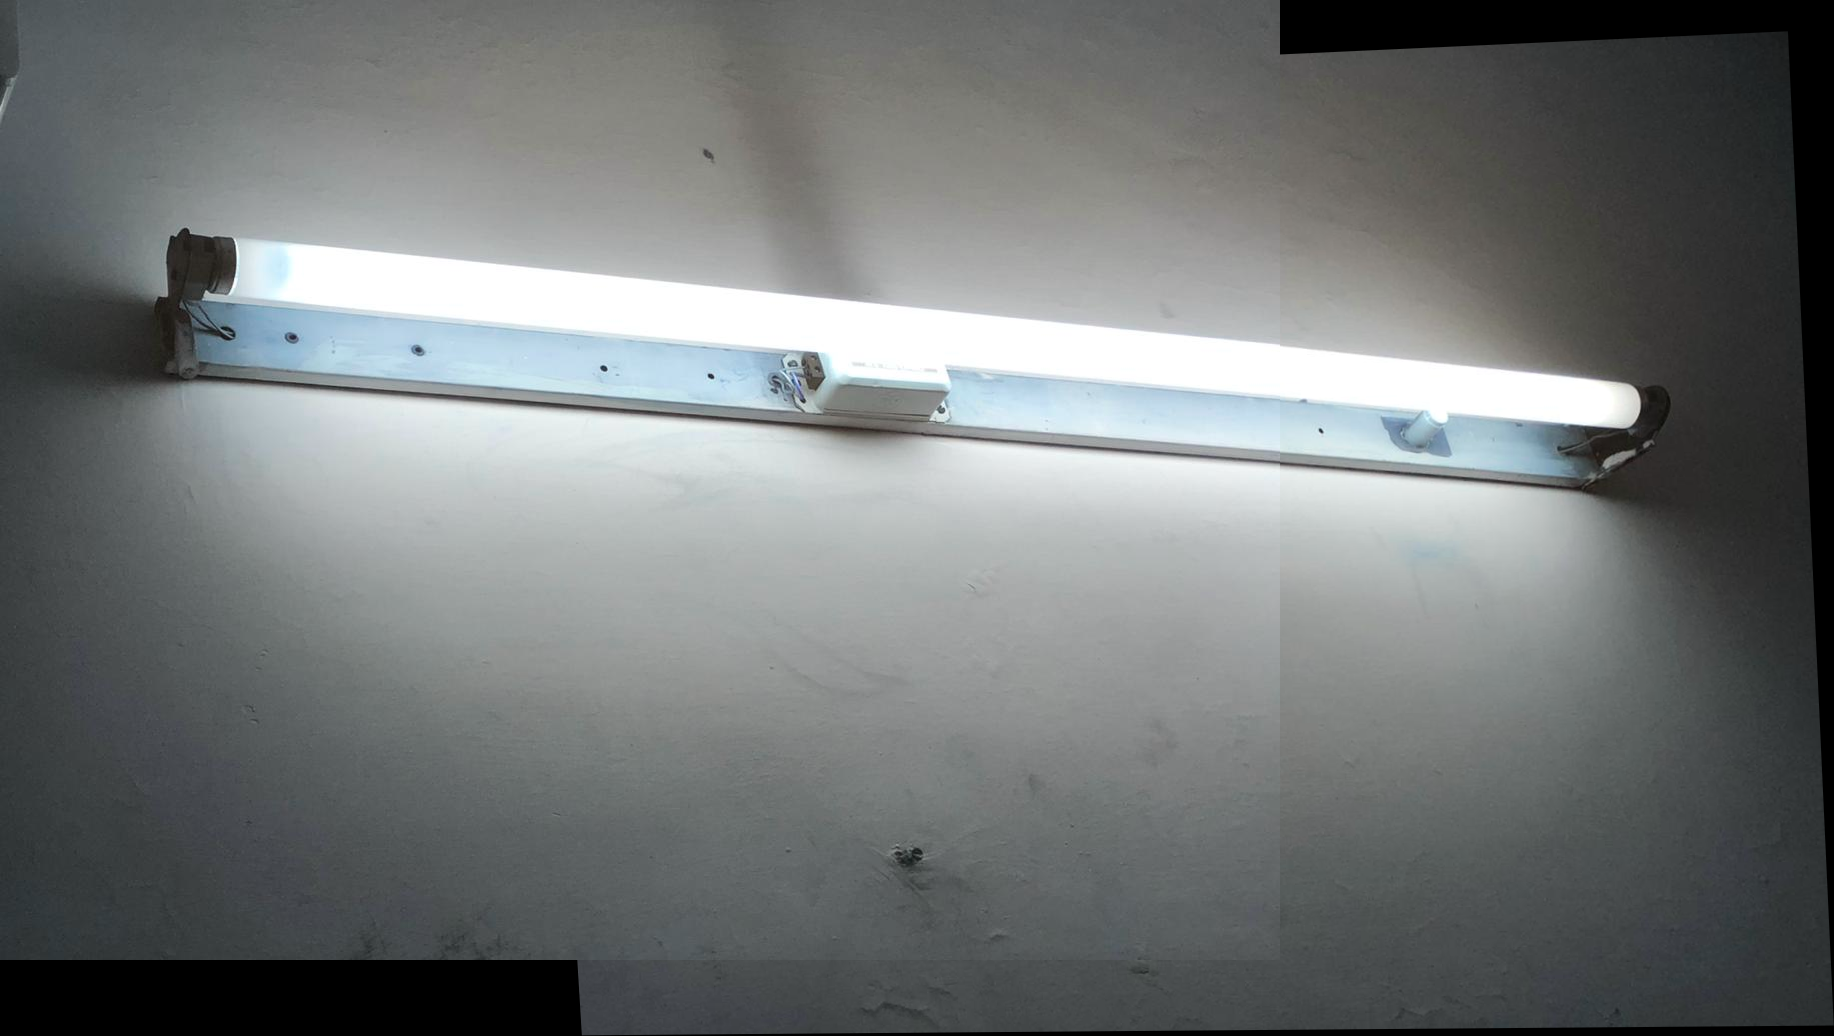

In [19]:
root='/content/drive/My Drive/CVIT Day 4/Homework/Eg3/'
images=os.listdir(root)
print(images)
save_path='drive/My Drive/CVIT Day 4/Homework/OEg3/'
for i in range (len(images)-1):
  path_right=root+images[i+1] 
  if i==0:
    path_left=root+images[i]
  else:
    path_left=save_image
  img_new=panorama(path_right,path_left)
  save_image=save_path+images[i+1][:-4]+"output.png"
  cv2_imshow(img_new)
  cv2.imwrite(save_image, cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR)) 

In [204]:
ls


img2_5output.png  img2_6output.png


In [203]:
cd 'drive/My Drive/CVIT Day 4/Panorama/Outputs/Eg2/'


/content/drive/My Drive/CVIT Day 4/Panorama/Outputs/Eg2


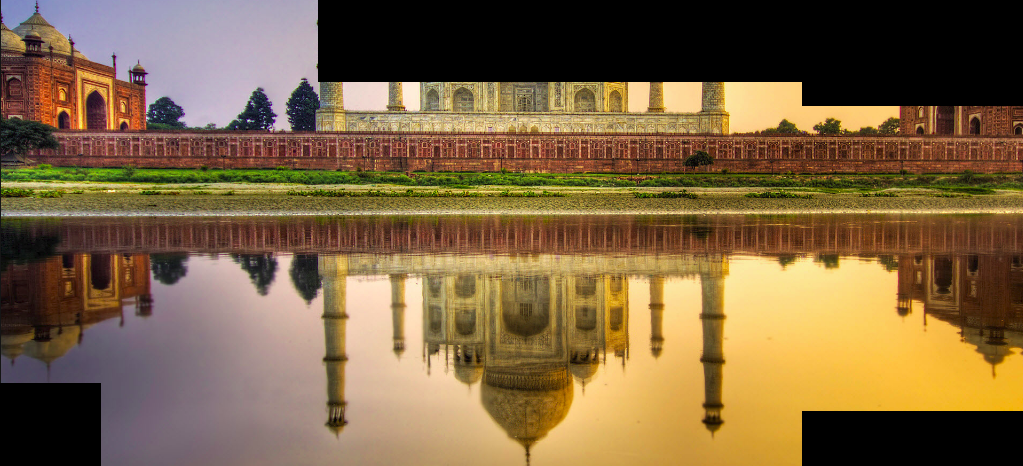

In [206]:
image = cv2.imread('./img2_6output.png')
cv2_imshow(image)

In [279]:
ls

book1.jpg  Points.npy     tsukuba_r.png  view1.png
book2.jpg  tsukuba_l.png  view0.png


In [278]:
cd Day4 Material

/content/drive/My Drive/CVIT Day 4/Day4 Material


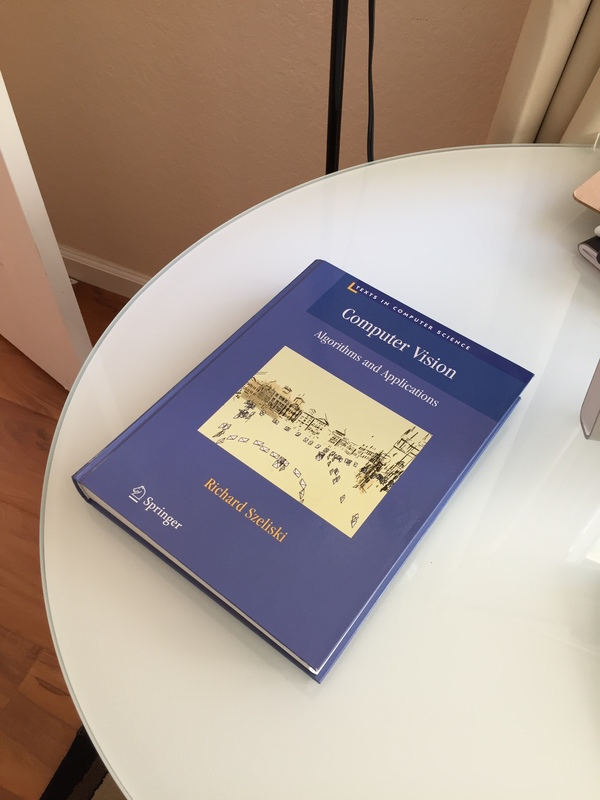

In [310]:
image1 = cv2.imread('./book1.jpg')
image2 = cv2.imread('./book2.jpg')
cv2_imshow(image1)

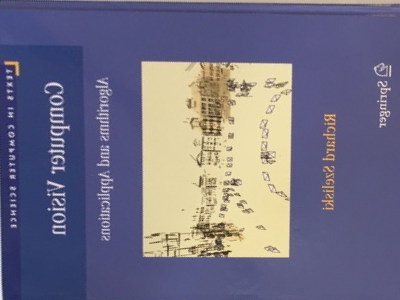

In [306]:
height,width=400,300
pts1 = np.float32([[316,260],[534,372],[78, 466],[315,668]]) # cola coords
pts2 = np.float32([[0,0],[0,width],[height, 0],[height, width]]) # stadium tile coords
# pts2 = np.float32([[50,50],[50,150],[150, 50],[150, 150]]) # stadium tile coords
M = cv2.getPerspectiveTransform(pts1,pts2)
im_affine= cv2.warpPerspective(image1,M,(height,width))
cv2_imshow(im_affine)
# M2 = cv2.getRotationMatrix2D((100,100),0,2.5)
# img1= cv2.warpAffine(im_affine,M2,(im_affine.shape[1],im_affine.shape[0]))
# cv2_imshow(img1)


In [0]:
height,width=400,300


[[141. 131.]
 [480. 159.]
 [493. 630.]
 [ 64. 601.]]
[[318. 256.]
 [534. 372.]
 [316. 670.]
 [ 73. 473.]]


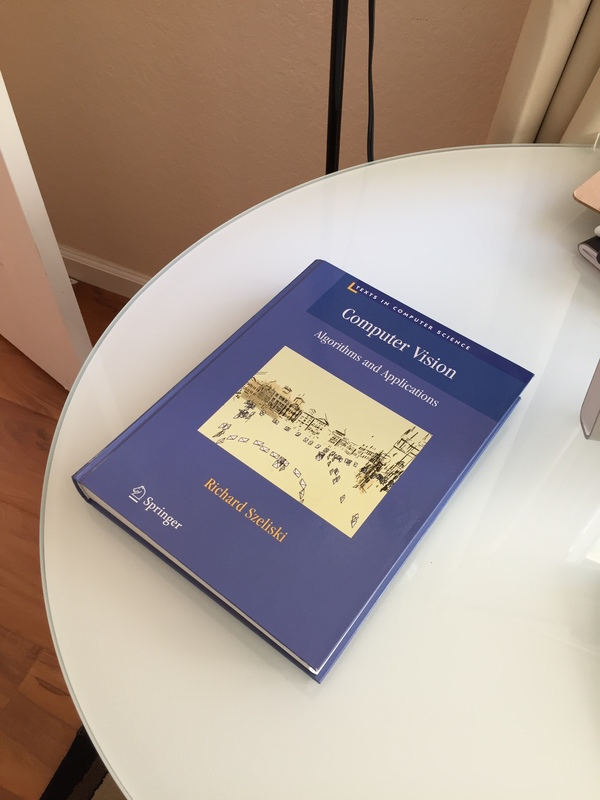

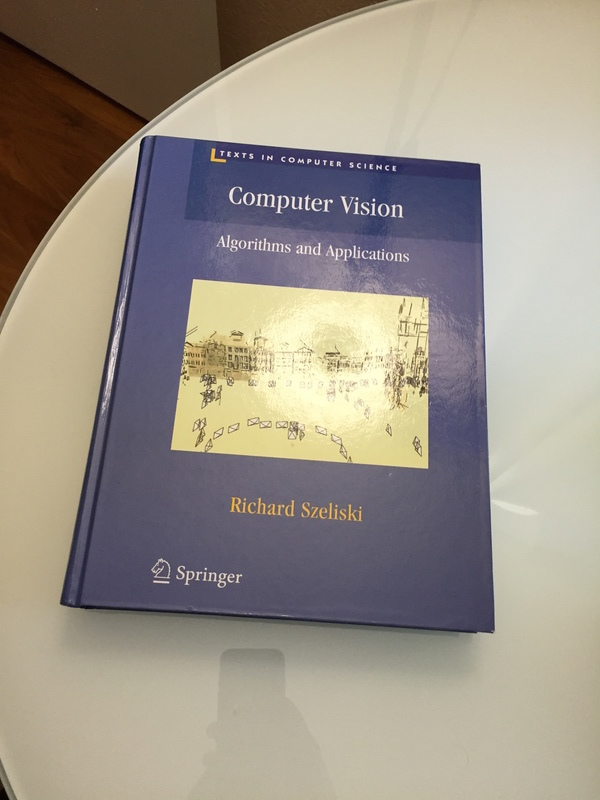

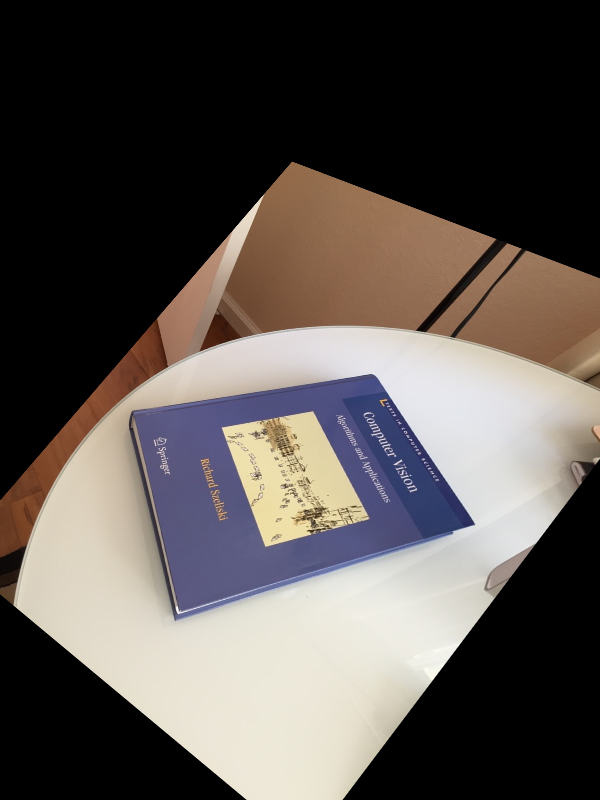

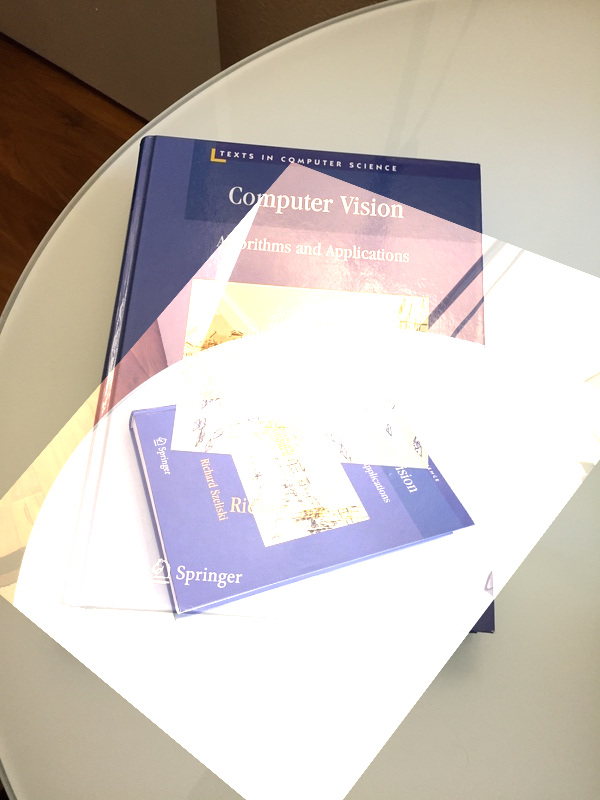

In [323]:
pts_src = np.float32([[141, 131], [480, 159], [493, 630],[64, 601]])

pts_dst = np.float32([[318, 256],[534, 372],[316, 670],[73, 473]])
pts1=pts_src
pts2=pts_dst
print(pts1)
print(pts2)
M = cv2.getPerspectiveTransform(pts1,pts2)
cv2_imshow(image1)
cv2_imshow(image2)
im_affine= cv2.warpPerspective(image1,M,(image2.shape[1],image2.shape[0]))
cv2_imshow(im_affine)
# cv2_imshow(image2)
final=cv2.add(image2,im_affine)
cv2_imshow(final)

In [324]:
ls

book1.jpg  Points.npy     tsukuba_r.png  view1.png
book2.jpg  tsukuba_l.png  view0.png      windoww.jpg


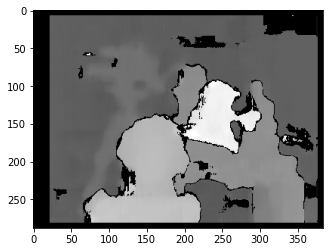

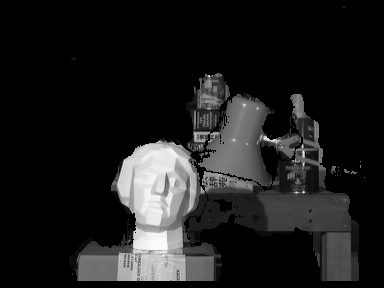

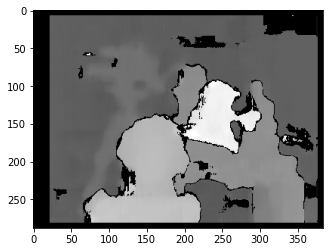

In [26]:
imgL = cv2.imread('tsukuba_l.png',cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('tsukuba_r.png',cv2.IMREAD_GRAYSCALE)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()
for i in range(disparity.shape[0]):
  for j in range(disparity.shape[1]):
    if(disparity[i][j]<120):
      imgL[i][j]=0
plt.imshow(disparity,'gray')
cv2_imshow(imgL)
# plt.imshow(imgL)

In [25]:
ls

book1.jpg  Points.npy     tsukuba_r.png  view1.png
book2.jpg  tsukuba_l.png  view0.png      windoww.jpg


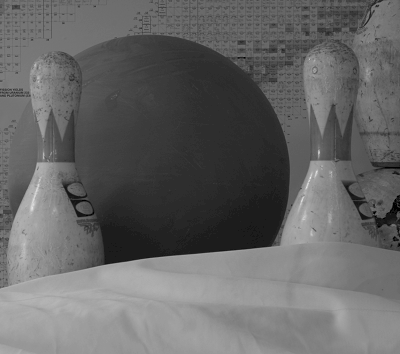

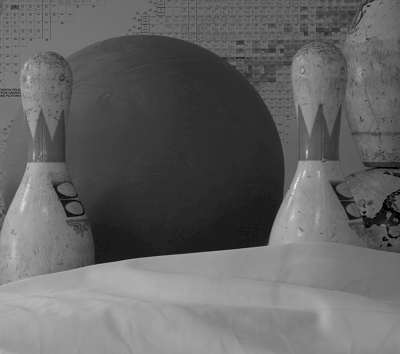

[[ 98  98  99 ... 105 101  95]
 [ 96 101  98 ... 109 103  99]
 [ 95  99  98 ... 106 101  99]
 ...
 [170 170 169 ... 133 133 134]
 [171 170 170 ... 132 133 135]
 [172 170 170 ... 133 134 132]]
uint8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


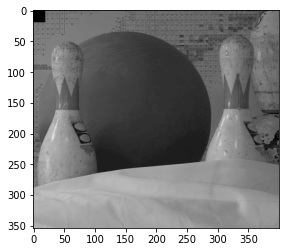

In [24]:
image1=cv2.imread('./view0.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('./view1.png',cv2.IMREAD_GRAYSCALE)
cv2_imshow(image1)
cv2_imshow(image2)

image1.shape[1]
def patch(Il,IR,xl,xr,yl,yr,a,b,):
  cost=0
  x11=max(xl-5,0)
  x22=max(xr-5,0)
  y11=max(yl-5,0)
  y22=max(yr-5,0)
  for i in range(0,10,1):
    for j in range(0,10,1):
      x11=min(xl+i,a-1)
      y11=min(yl+i,b-1)
      x22=min(xr+i,a-1)
      y22=min(yr+i,b-1)
      cost+=(Il[x11][y11]-IR[x22][y22])**2
  return [cost,yr]
row,col=image1.shape
disparity=image1
print(disparity)
print(disparity.dtype)
for i in range(int(20)):
  for j in range(int(20)):
    #i,j, is xl yl now find xr
    costs=[[100000000000000000000000,0]]
    for k in range(0,j,1):
      costs=costs+[patch(image1,image2,i,i,j,k,image1.shape[0],image1.shape[1])]
    A=sorted(costs)
    # print(A[0][0])
    val=(j-A[0][1])/image1.shape[1]
    val=val*255
    val=int(val)
    # print(val)
    disparity[i][j]=val
plt.imshow(disparity,'gray')
# print(image3)  
# disparity=image3

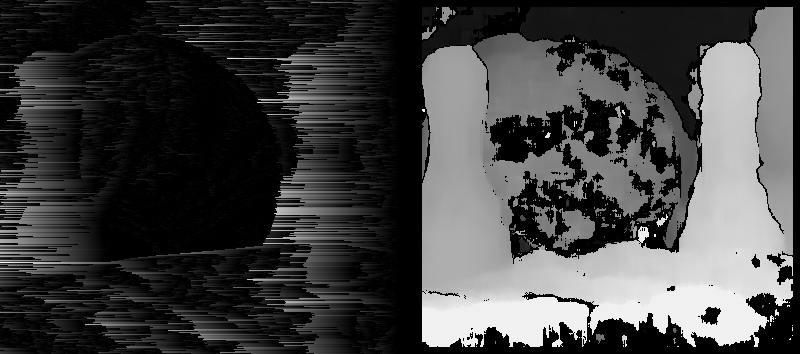

In [25]:
#filter size 3

left = cv2.imread('./view0.png', cv2.IMREAD_GRAYSCALE)
h,w = left.shape
l = np.zeros((h+2, w + 2))
l[1:-1,1:-1] = left
left = l
right = cv2.imread('./view1.png', cv2.IMREAD_GRAYSCALE)
l = np.zeros((h+2, w + 2))
l[1:-1,1:-1] = right
right = l
# cv2_imshow(np.hstack([left,right]))

disp = np.zeros((h,w))

def cost_func(a,b):
  return ((a-b)**2).sum()

for i in range(h):
  for j in range(w):
    m, idx = 100000000, j
    for k in range(j,w):
      c = (( left[i+1,k+1].astype('int') - right[i+1,k+1].astype('int') )**2).sum()
      if c < m:
        m = c
        idx = k
    disp[i,j] = abs(idx - j)

copy = np.copy(disp)
copy = ((copy - copy.min())/copy.max() * 255).astype('uint8')

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(left[1:-1,1:-1].astype('uint8'), right[1:-1,1:-1].astype('uint8'))

cv2_imshow(np.hstack([copy, disparity]))    